<a href="https://colab.research.google.com/github/epereirasg/Curso-de-Machine-Learning/blob/main/Pinguinos/Entrega_de_Ernesto_Tarea_Pinguinos_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Autor: Ernesto Pereiras García**

**Script python para clasificar las especies de pingüinos**

Crear un script python para clasificar las especies de pingüinos.

   1. (2 puntos) Usar la clasificación a través de KNN (ver clases grabadas y links del libro estudiado)
   2. (2 puntos) Usar validación cruzada de 10 "folds" (ver clases grabadas y links del libro estudiado)
   3. (2 puntos) Reportar la certeza promedio resultante. Éste estadístico corresponde al valor promedio de las 10 certezas obtenidas en la validación cruzada

Formato de entrega:  Incluir en la descripción un link a google Colab que contiene el script en python (por favor no adjuntar archivos)

In [1]:
import pandas as pd # amnipulacion de datos
import numpy as np # parte numerica
import matplotlib.pyplot as plt # visualizacion grafica
import seaborn as sns # mejora graficas, paletas de colores
# sklearn kit cientifico con mnodulos de machile learning.
from sklearn.model_selection import train_test_split # divide conjuntos de entrenamiento y validacione
from sklearn.preprocessing import StandardScaler # preprocesamiento de datos, en particular estandarizacion de datos.
from sklearn.neighbors import KNeighborsClassifier # algoritmo knn propiamente tal
from sklearn.metrics import confusion_matrix # matrices de confusión para analizar los resultados de los clasificadores
from sklearn.metrics import f1_score # tuvimos una métrica en particular que se conoce como score f1
from sklearn.metrics import accuracy_score # esta es la métrica por excelencia, denominada certeza en español


**Cargando el dataset**

In [2]:
dataset = pd.read_csv('penguins_size.csv')
len(dataset) ## esta función simplemente no se entrega la cantidad de instancias que existen en el conjunto de datos


344

In [3]:
dataset.info() # chequiando los tipos de las columnas y los valores nulos o vacios


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [4]:
dataset.head(n=8) ## Head se pide prestada de Unix y muestra por defecto las primeras N líneas del conjunto de datos

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
6,Adelie,Torgersen,38.9,17.8,181.0,3625.0,FEMALE
7,Adelie,Torgersen,39.2,19.6,195.0,4675.0,MALE


En primer lugar, lo que deberíamos hacer es controlar si existen valores faltantes o nulos; esto lo podemos realizar utilizando el método isnull() del siguiente modo:

In [5]:
# Controlando valores nulos, devuelve true si existen valores nulos
dataset.isnull().any().any()

True

El método nos devuelve el valor "True", lo que indica que existen valores nulos en nuestro dataset. Estos valores pueden tener una influencia significativa en nuestro modelo predictivo, por lo que siempre es una decisión importante determinar la forma en que los vamos a manejar. Las alternativas que tenemos son:

1.Dejarlos como están, lo que a la larga nos va a traer bastantes dolores de cabeza ya que en general los algoritmos no los suelen procesar correctamente y provocan errores.

2.Eliminarlos, lo que es una alternativa viable aunque, dependiendo la cantidad de valores nulos, puede afectar significativamente el resultado final de nuestro modelo predictivo.

3.Inferir su valor. En este caso, lo que podemos hacer es tratar de inferir el valor faltante y reemplazarlo por el valor inferido. Esta suele ser generalmente la mejor alternativa a seguir.

Existen valores ausentes, identificados como NaN. En este caso tenemos datos del tipo categóricos y datos numéricos, vamos a inferir los valores faltantes utilizando la media aritmética para los datos cuantitativos y la moda para los datos categóricos.


In [7]:
# Agrupando columnas por tipo de datos
tipos = dataset.columns.to_series().groupby(dataset.dtypes).groups

# Armando lista de columnas categóricas
ctext = tipos[np.dtype('object')]
len(ctext)  # cantidad de columnas con datos categóricos.

3

In [8]:
# Armando lista de columnas numéricas
columnas = dataset.columns  # lista de todas las columnas
cnum = list(set(columnas) - set(ctext))
len(cnum)

4

Existe un total de 7 columnas para nuestro ejemplo, de ellas 3 poseen datos del tipo categórico y las 4 restantes son del tipo numérico. Ahora procederemos a inferir los datos.


In [9]:
# Completando valores faltantas datos cuantititavos, para lo que utilizaremos la media.
for c in cnum:
    mean = dataset[c].mean()
    dataset[c] = dataset[c].fillna(mean)

In [10]:
# Completando valores faltantas datos categóricos, para lo que utilizaremos la moda
for c in ctext:
    mode = dataset[c].mode()[0]
    dataset[c] = dataset[c].fillna(mode)

In [11]:
# Controlando que no hayan valores faltantes, si devuelve false nos aseguramos de que no existen valores faltantes.
dataset.isnull().any().any()

False

Veremos los datos para verificar los cambios realizados hasta el momento

In [12]:
dataset.head(n=8)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.10000,18.70000,181.000000,3750.000000,MALE
1,Adelie,Torgersen,39.50000,17.40000,186.000000,3800.000000,FEMALE
2,Adelie,Torgersen,40.30000,18.00000,195.000000,3250.000000,FEMALE
3,Adelie,Torgersen,43.92193,17.15117,200.915205,4201.754386,MALE
4,Adelie,Torgersen,36.70000,19.30000,193.000000,3450.000000,FEMALE
5,Adelie,Torgersen,39.30000,20.60000,190.000000,3650.000000,MALE
6,Adelie,Torgersen,38.90000,17.80000,181.000000,3625.000000,FEMALE
7,Adelie,Torgersen,39.20000,19.60000,195.000000,4675.000000,MALE


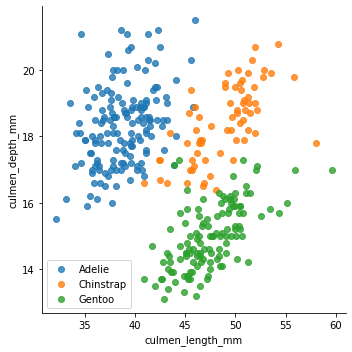

In [13]:

dataset["culmen_length_mm"] = dataset["culmen_length_mm"]
dataset["culmen_depth_mm"] = dataset["culmen_depth_mm"]

sns.lmplot(x="culmen_length_mm", y="culmen_depth_mm", data=dataset, hue="species", fit_reg=False, legend=False)

plt.legend()
plt.show()

Con el objetivo de transformar datos categóricos en representaciones numéricas, podemos usar la codificación one-hot (también conocida como codificación ficticia). La codificación one-hot es un tipo de representación vectorial en la que todos los elementos de un vector son cero, excepto uno, que tiene uno que representa una categoría específica. Para simplificación de este ejemplo haremos lo siguiente



In [ ]:
dataset.replace({"sex": {"MALE": 1, "FEMALE": 2}}, inplace=True)

In [ ]:
dataset.replace({"island": {"Dream": 1, "Torgersen": 2, "Biscoe": 3}}, inplace=True)

In [ ]:
dataset.head()
dataset["island"]

0      2
1      2
2      2
3      2
4      2
      ..
339    3
340    3
341    3
342    3
343    3
Name: island, Length: 344, dtype: int64

Ahora tenemos un dataset limpio de valores faltantes y preprocesados. Estamos conformes con el estado de los datos, nos corresponde diferenciar entre los datos que van a ser utilizados para el entrenamiento y aquellos que se van a usar para la validación.

train_test_split se encarga automáticamente de dividir los conjuntos de entrenamiento y validación, lo único que hacemos es especificar cuáles son las proporciones que queremos

In [ ]:
# split dataset
X = dataset.iloc[:, 1:7] ## X corresponde a las variables independientes
y = dataset.iloc[:, 0] ## y se usa para denotar la variable objetivo o Target

In [ ]:
X.head()


,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,2,39.10000,18.70000,181.000000,3750.000000,1
1,2,39.50000,17.40000,186.000000,3800.000000,2
2,2,40.30000,18.00000,195.000000,3250.000000,2
3,2,43.92193,17.15117,200.915205,4201.754386,1
4,2,36.70000,19.30000,193.000000,3450.000000,2


In [ ]:
y.head()

0    Adelie
1    Adelie
2    Adelie
3    Adelie
4    Adelie
Name: species, dtype: object

Se dividen los datos de entrenamiento de los datos de test, donde X representa los datos y Y representas las etiquetas. Consideranto un 30% de datos de test [test_size=0.3], de forma al azar [*random_state=0"].

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.3)

In [ ]:
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))

240
240
104
104


La estandarización de los datos o normalización tiene que ver con dejar todos los valores en un rango comparable. En general es un paso importante que se aplica casi todas las veces al momento de hacer modelamiento. En general es un paso importante que se aplica casi todas las veces al momento de hacer modela miento.

In [ ]:
sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

ValueError: ignored

In [ ]:
print(len(X_train))
print(len(y_train))
print(len(X_test))
print(len(y_test))


240
240
104
104


**PREDICCIÓN**

Definir el modelo: Init K-NN. Establecer los parámetros del modelo de clasificación

In [ ]:
# Define the model: Init K-NN
classifier = KNeighborsClassifier(n_neighbors=11, p=2,metric='euclidean')

In [ ]:
# Fit Model
classifier.fit(X_train, y_train)

ValueError: ignored

Para realizar predicciones entonces vamos a utilizar nuestro conjunto de validación. Dado que el conjunto de validación tiene 69 instancias, el modelo contesta 69 etiquetas en ceros y unos que es los valores posibles que pueden tener

In [ ]:
# Predict the test set results
y_pred = classifier.predict(X_test)
y_pred

array([0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 1], dtype=uint8)

Es difícil determinar qué tan efectivo fue el modelo al revisar solamente ceros y unos. Entonces por ello necesitamos desarrollar una estrategia de validación, que nos entregue algún resumen estadístico que podamos comprender.

Una técnica muy común es la llamada matriz de confusión. Esta matriz tiene tantas filas como etiquetas, y las columnas también tienen etiquetas pero en las filas tienen las columnas reales los valores reales de las instancias mientras que las columnas se tienen las que arrojó el sistema. Cuando estas etiquetas coinciden se asume que hubo un acierto. Análoga mente cuando estas etiquetas difieren se considera que hubo un error


In [ ]:
# Evaluate Model
cm = confusion_matrix(y_test, y_pred)
print (cm)
print(f1_score(y_test, y_pred))

[[40  3]
 [ 4 22]]
0.8627450980392156


Visualizar la Matriz

In [ ]:
sns.heatmap(cm, annot=True, cbar=None, cmap="Blues")
plt.title("Confusion Matrix"), plt.tight_layout()
plt.ylabel("True Class"), plt.xlabel("Predicted Class")
plt.show()

Al sumar los elementos de las diagonales tendremos una estimación de cuántas veces tuvimos éxito. De allí se puede sacar uno de los estadísticos más importantes para comprender la efectividad del modelo predictivo. A esa estadístico se le conoce como certeza.

In [ ]:
print(accuracy_score(y_test, y_pred))

0.8985507246376812
